#Model Explanation

##K-NN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


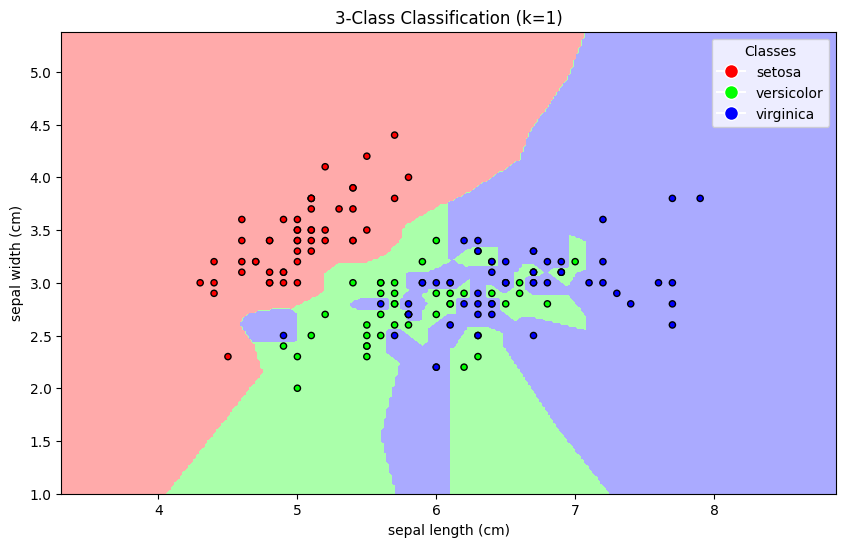

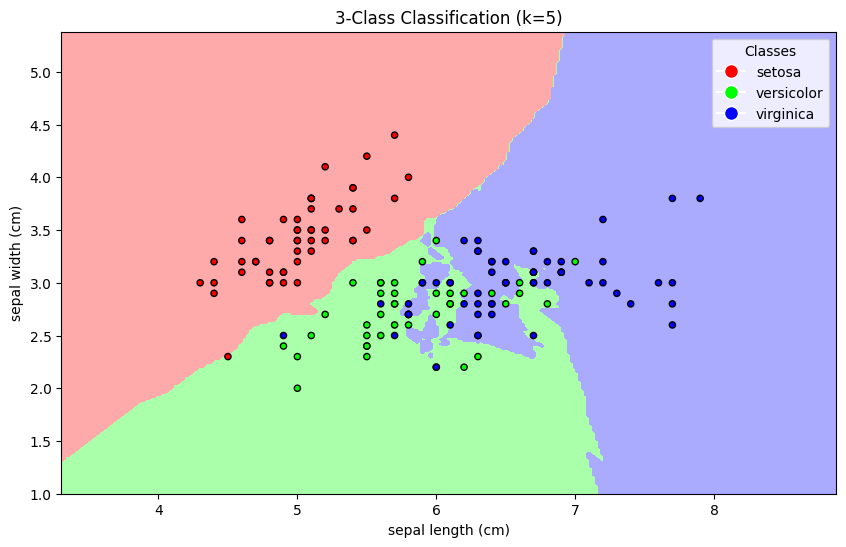

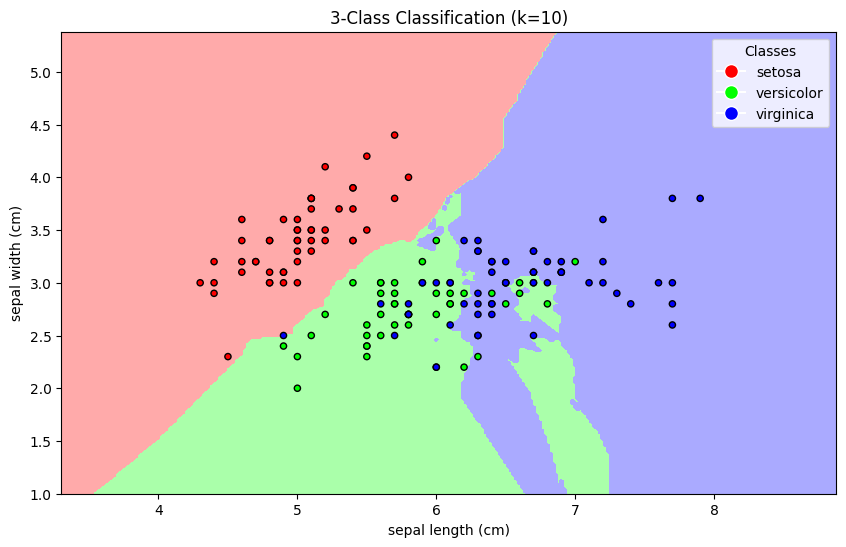

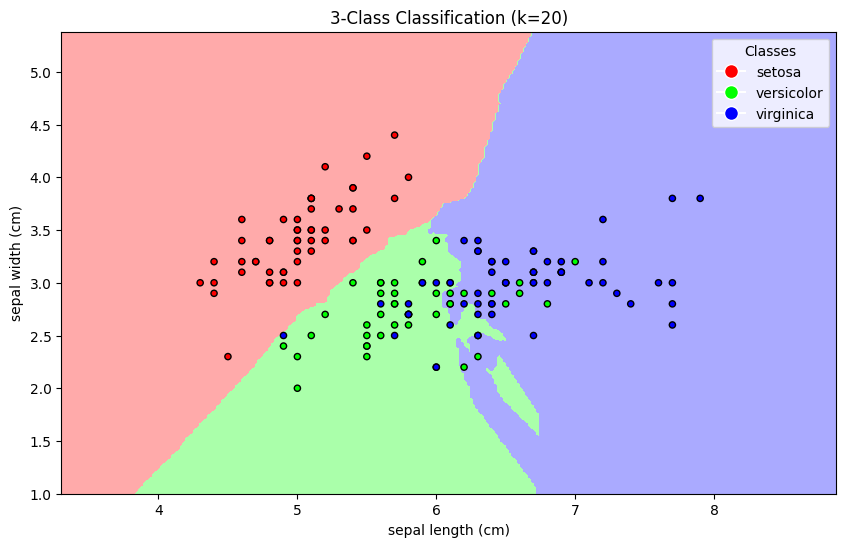

In [ ]:
#load dataset (use only the first two features for 2D plotting)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
class_names = iris.target_names

#Define function to plot decision boundaries
def plot_decision_boundaries(X, y, k):
  #create color maps
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

  #TRAIN KNN MODEL
  clf = neighbors.KNeighborsClassifier(n_neighbors=k)  #Classifier Object, KNN
  clf.fit(X, y) #.fit --> Training Model (Model belajar dari data yang ada)

  #Create mash grid
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))

  #Predict class for each point in the mesh grid
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  #Plot the decision boundary
  plt.figure(figsize=(10,6))
  plt.contourf(xx, yy, Z, cmap=cmap_light)

  #Plot the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolors='k', s=20)

  #Create a legend
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_bold(i), markersize=10,
            label=class_names[i]) for i in range(len(class_names))]
  plt.legend(handles=handles, title='Classes')

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f"3-Class Classification (k={k})")
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  plt.show()

#plot decision boundaries for different values of K
for k in [1, 5, 10, 20]:
  plot_decision_boundaries(X, y, k)

#Decision Tree

In [ ]:
##Decision Tree
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
clf = DecisionTreeClassifier(random_state=1234) #Initalize Classifier
clf.fit(X, y) #classifier training

DecisionTreeClassifier(random_state=1234)

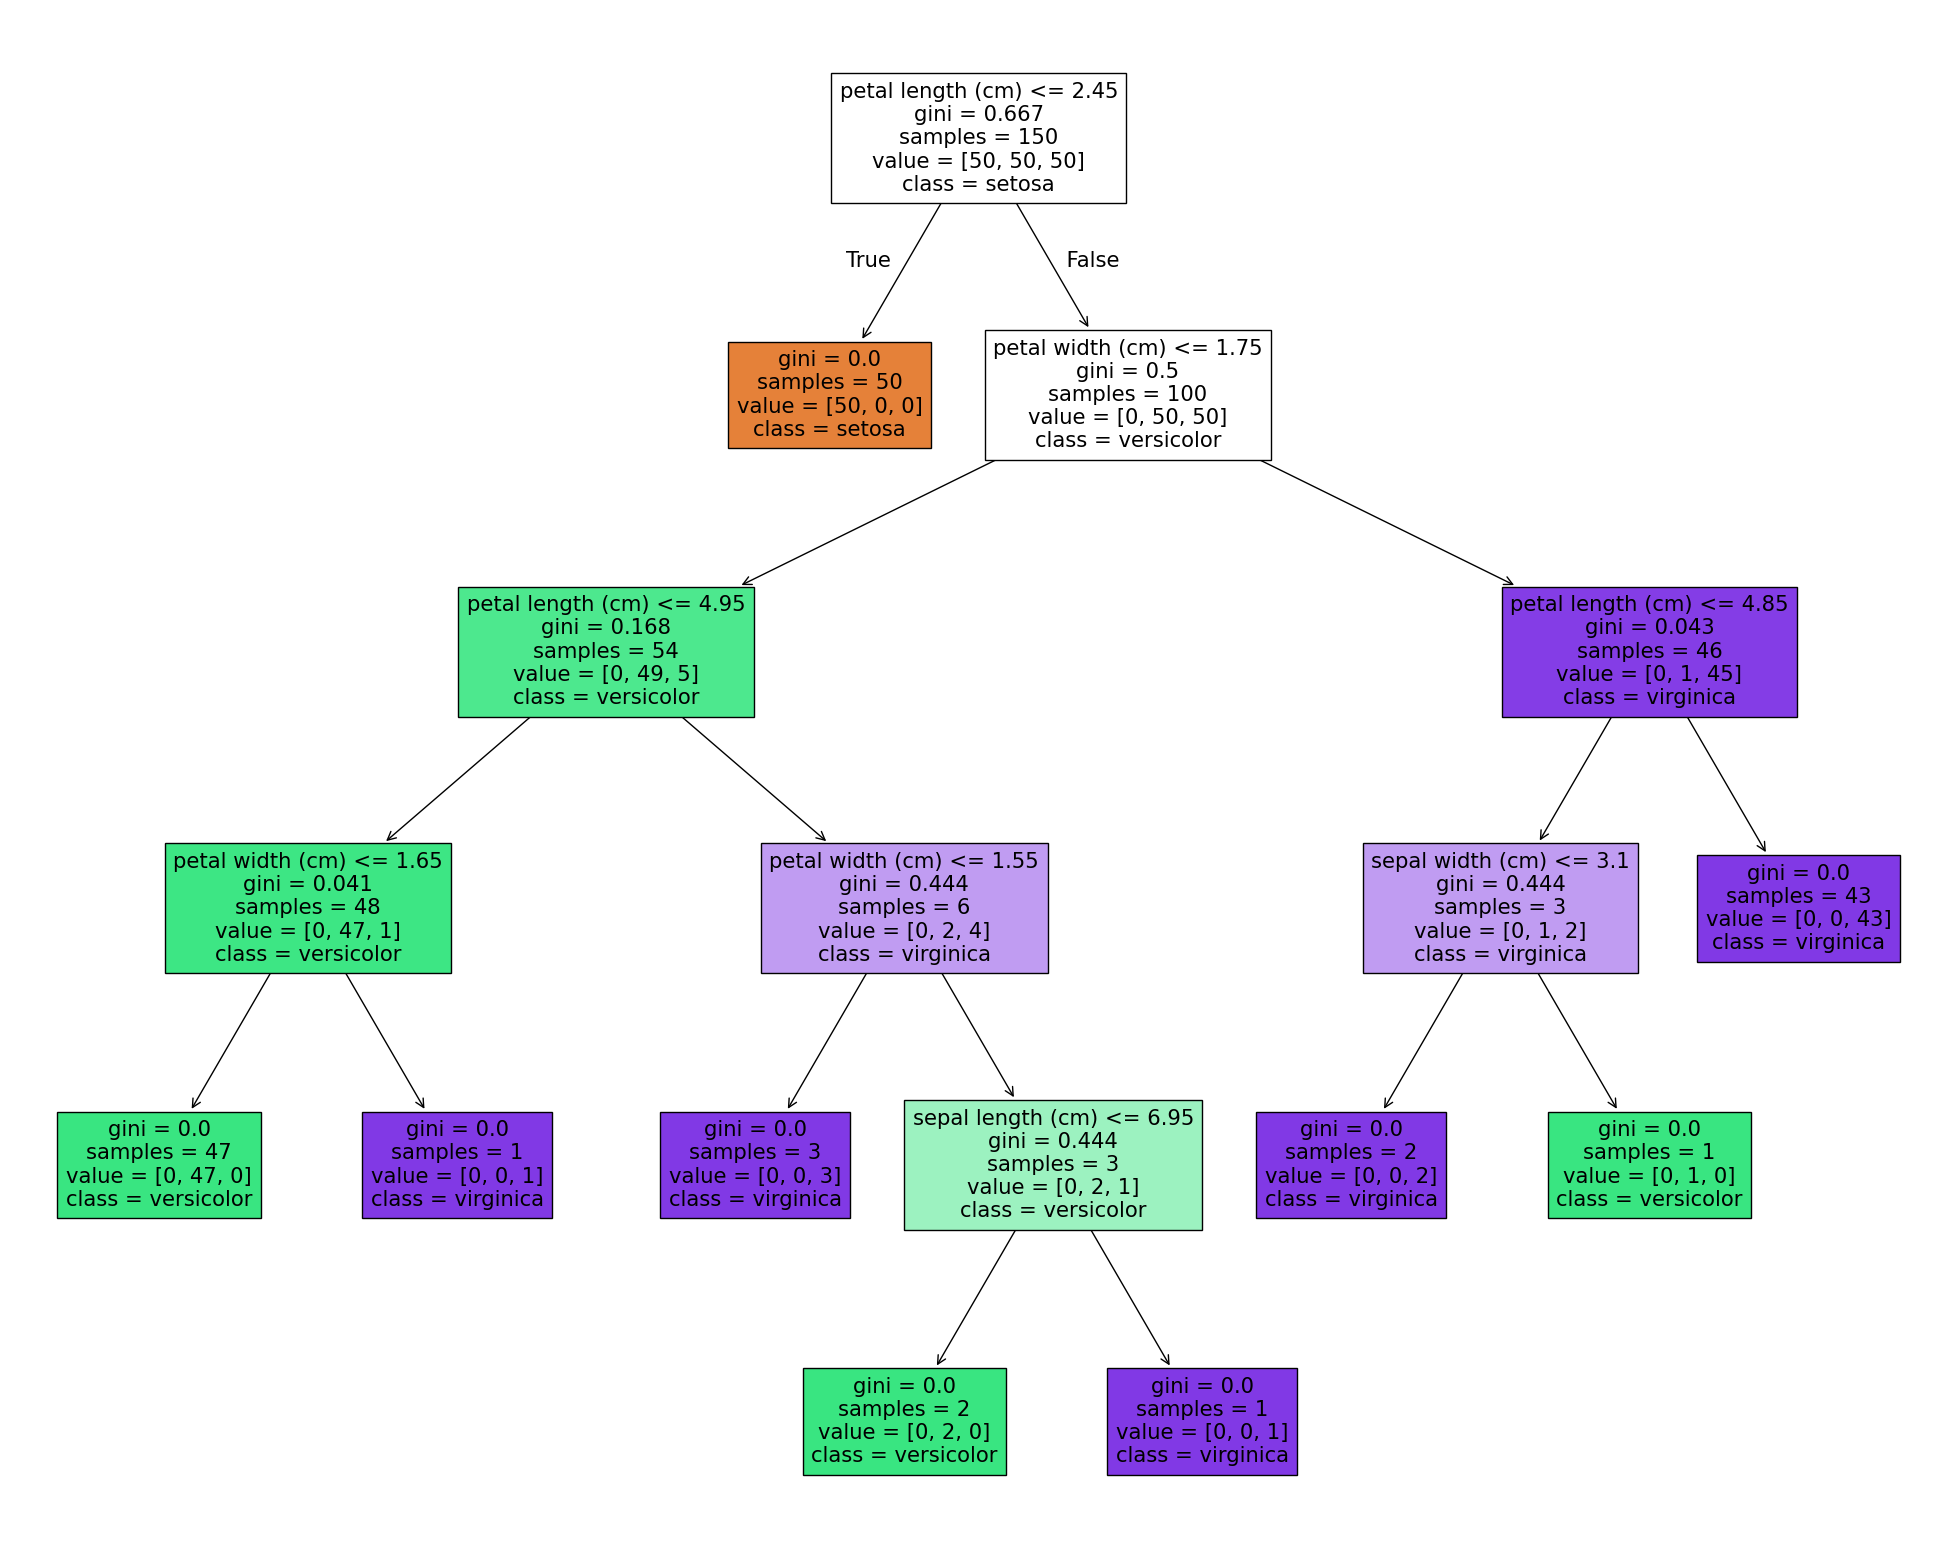

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

#Model Building

#Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Data Preprocessing

In [ ]:
#first - Checking null data
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#input data for null data in column 'Age'
data.loc[data['Age'].isnull(), 'Age'] = data['Age'].median()

In [ ]:
#second -Checking duplicate data
data.duplicated().sum()

0

In [ ]:
#Engineering column 'Sex', Categorical Endocing
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [ ]:
#last - define X & y
X = data [['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']]
y = data['Survived']

##Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Split train and test data from the above dataset
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#agar splitting tidak berubah diberi random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
332,1,38.0,0,1,153.4625,True
281,3,28.0,0,0,7.8542,True
147,3,9.0,2,2,34.3750,False
11,1,58.0,0,0,26.5500,False
405,2,34.0,1,0,21.0000,True


In [ ]:
X_train_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,-1.532879,0.655795,-0.474774,0.744162,2.320077,0.735612
1,0.842333,-0.120045,-0.474774,-0.465526,-0.483321,0.735612
2,0.842333,-1.594141,1.332921,1.953851,0.027284,-1.359412
3,-1.532879,2.207475,-0.474774,-0.465526,-0.123371,-1.359412
4,-0.345273,0.345459,0.429074,-0.465526,-0.230225,0.735612


#Classification Model

##Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier  #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import confusion_matrix #Model Evaluation Metrics
from sklearn import tree
import seaborn as sns  #Data Visualization Package

In [ ]:
def classification_eval(aktual, prediksi, name):
  #Compute confusion metrix
  cm = confusion_matrix(aktual, prediksi)
  tp = cm[1][1]
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]

  #Print confusion matrix values
  print('True Positives:', tp)
  print('True Negatives:', tn)
  print('False Positives:', fp)
  print('False Negatives:', fn)

  #Compute evaluation metrics
  accuracy = round((tp+tn)/ (tp+tn+fp+fn) + 100, 2)
  precision = round((tp) / (tp + fp) + 100, 2)
  recall = round((tp) / (tp + fn) + 100, 2)

  #Print evaluation metrics
  print('Evaluation Model:', name)
  print('Confusion Metrix:\n', cm)
  print('Accuracy :', accuracy, '%')
  print('Precision :', precision, '%')
  print('Recall :', recall, '%')

  #Plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Labels')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

##Find optimal value of K

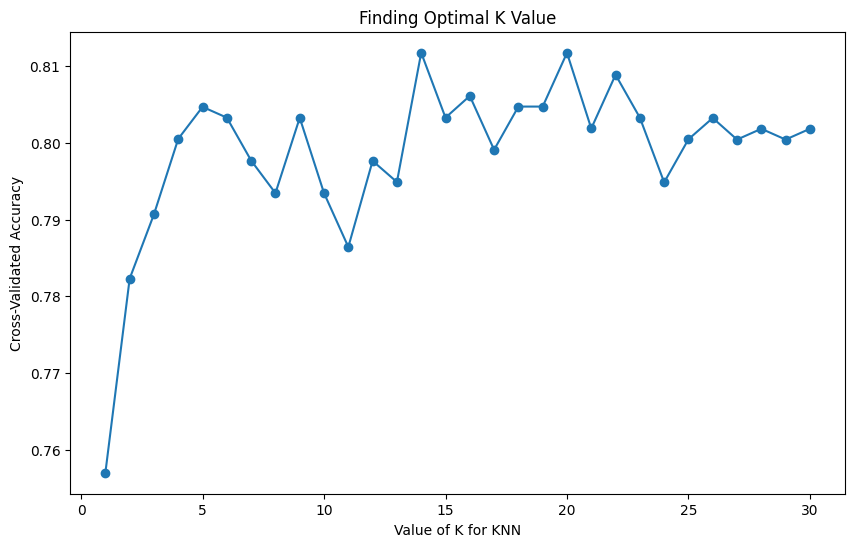

The Optimal Value of K is 14


In [ ]:
k_range = range(1, 31) #K between 1 to 31
k_scores = []

#Perform cross-validation for each K
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

#Plotting the results
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal K Value')
plt.show()

#Find the optimal K Value
optimal_k = k_range[np.argmax(k_scores)]
print(f'The Optimal Value of K is {optimal_k}')

##KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

True Positives: 228
True Negatives: 390
False Positives: 42
False Negatives: 52
Evaluation Model: KNN Training
Confusion Metrix:
 [[390  42]
 [ 52 228]]
Accuracy : 100.87 %
Precision : 100.84 %
Recall : 100.81 %


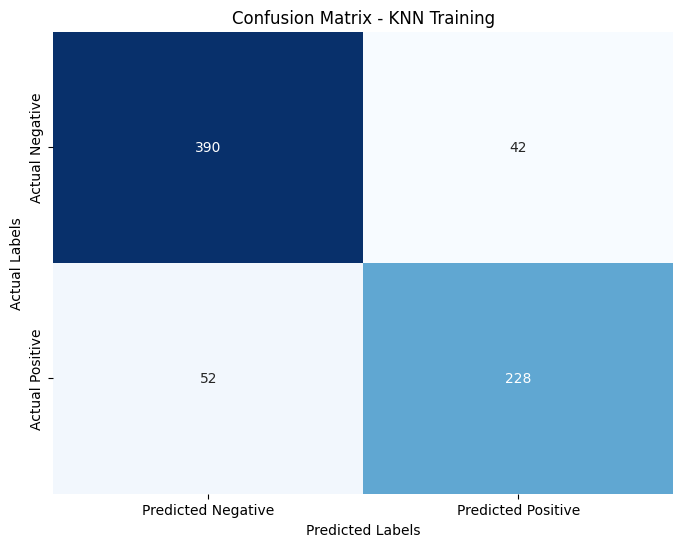

In [ ]:
classification_eval(y_train, y_train_pred, 'KNN Training')

True Positives: 48
True Negatives: 104
False Positives: 13
False Negatives: 14
Evaluation Model: KNN Training
Confusion Metrix:
 [[104  13]
 [ 14  48]]
Accuracy : 100.85 %
Precision : 100.79 %
Recall : 100.77 %


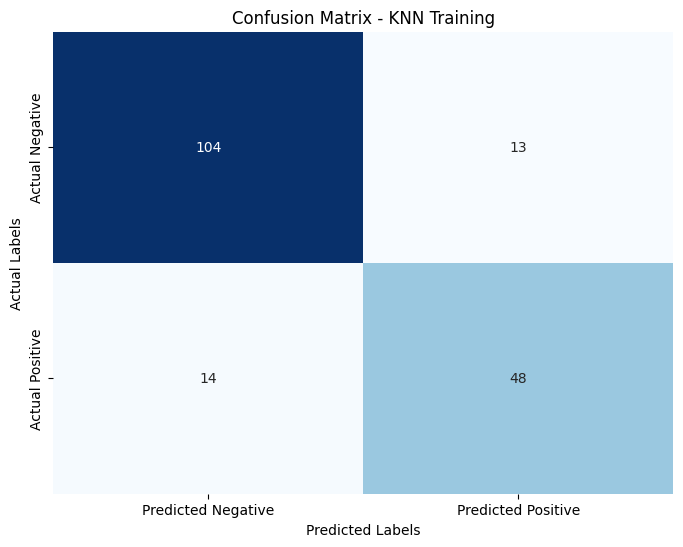

In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Training')

#Decision Tree

##Find Optimal Parameter - with GridSearchCV

In [ ]:
#Define the parameter grid to be search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, ],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2,4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

#Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier()

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Print the best parameters found
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
288 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

##Decision Tree Model

In [ ]:
dectree = DecisionTreeClassifier(max_depth=20, criterion ='entropy', min_samples_leaf=2)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2)

In [ ]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

True Positives: 233
True Negatives: 423
False Positives: 9
False Negatives: 47
Evaluation Model: Decision Tree Training
Confusion Metrix:
 [[423   9]
 [ 47 233]]
Accuracy : 100.92 %
Precision : 100.96 %
Recall : 100.83 %


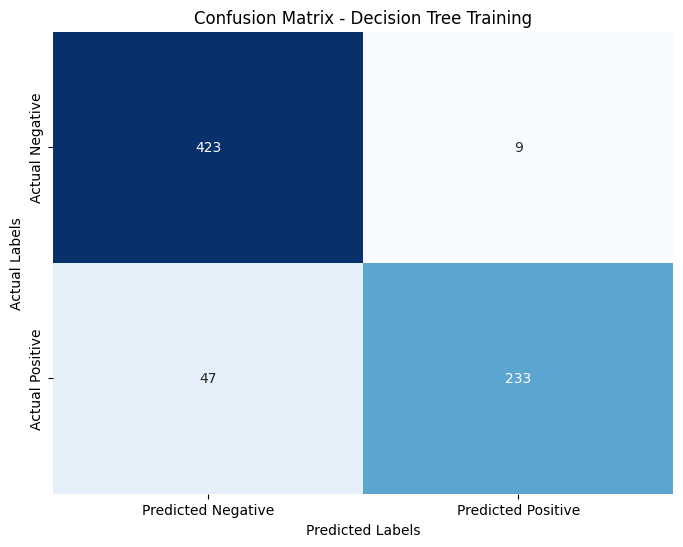

In [ ]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

True Positives: 48
True Negatives: 104
False Positives: 13
False Negatives: 14
Evaluation Model: Decision Tree Training
Confusion Metrix:
 [[104  13]
 [ 14  48]]
Accuracy : 100.85 %
Precision : 100.79 %
Recall : 100.77 %


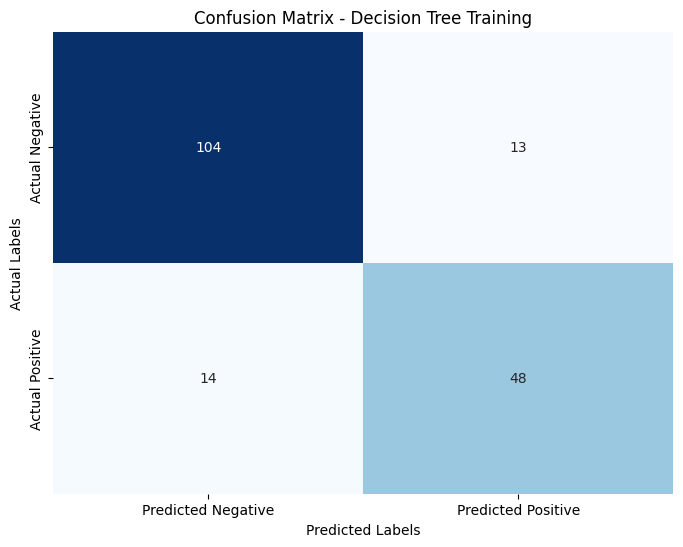

In [ ]:
classification_eval(y_test, y_test_pred, 'Decision Tree Training')

#Random Forest

In [ ]:
ranfor = RandomForestClassifier(max_depth=18)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=18)

In [ ]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

True Positives: 272
True Negatives: 427
False Positives: 5
False Negatives: 8
Evaluation Model: Random Forest Training
Confusion Metrix:
 [[427   5]
 [  8 272]]
Accuracy : 100.98 %
Precision : 100.98 %
Recall : 100.97 %


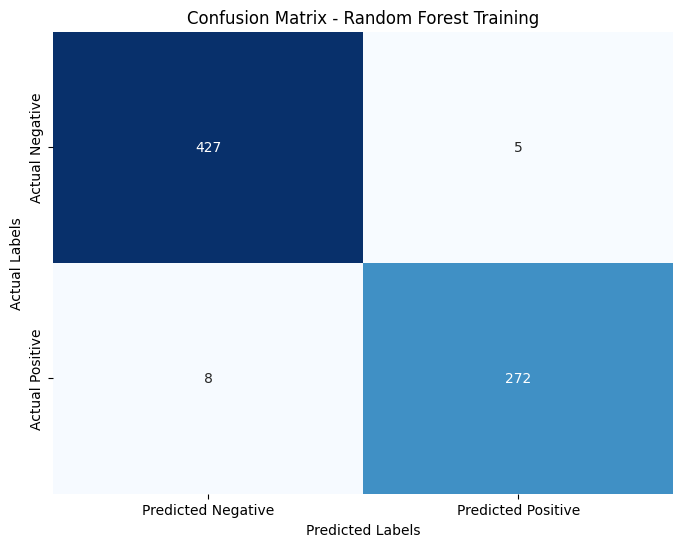

In [ ]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

True Positives: 52
True Negatives: 98
False Positives: 19
False Negatives: 10
Evaluation Model: Random Forest Training
Confusion Metrix:
 [[98 19]
 [10 52]]
Accuracy : 100.84 %
Precision : 100.73 %
Recall : 100.84 %


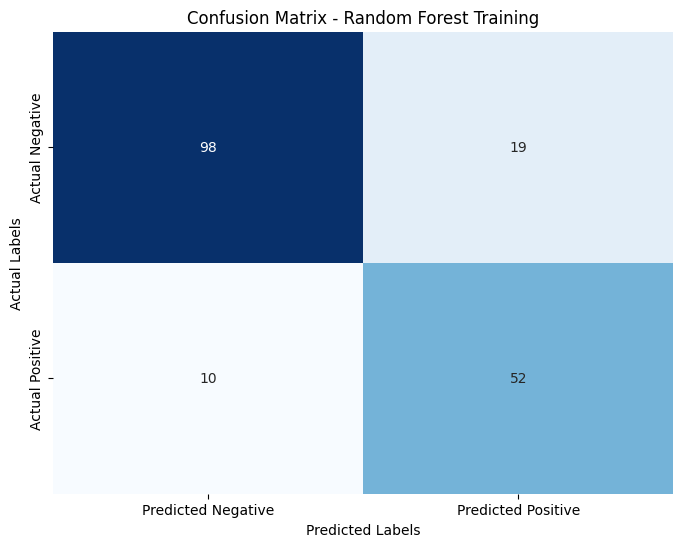

In [ ]:
classification_eval(y_test, y_test_pred, 'Random Forest Training')

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

True Positives: 196
True Negatives: 363
False Positives: 69
False Negatives: 84
Evaluation Model: Logistic Regression Training
Confusion Metrix:
 [[363  69]
 [ 84 196]]
Accuracy : 100.79 %
Precision : 100.74 %
Recall : 100.7 %


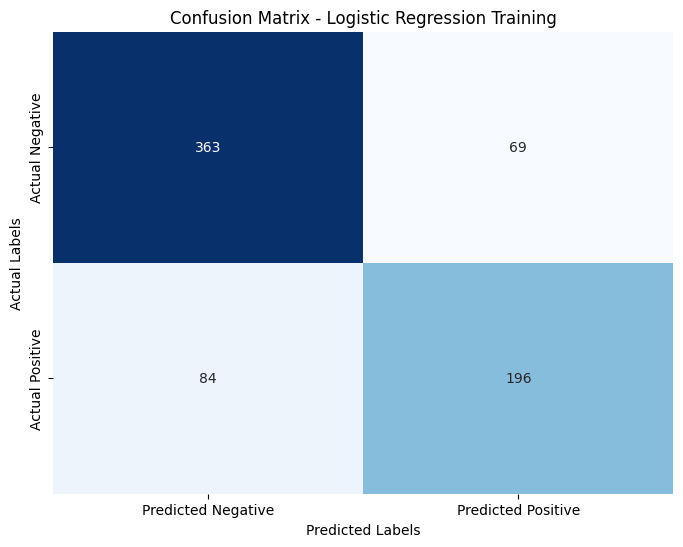

In [ ]:
classification_eval(y_train, y_train_pred, 'Logistic Regression Training')

True Positives: 48
True Negatives: 102
False Positives: 15
False Negatives: 14
Evaluation Model: Logistic Regression Training
Confusion Metrix:
 [[102  15]
 [ 14  48]]
Accuracy : 100.84 %
Precision : 100.76 %
Recall : 100.77 %


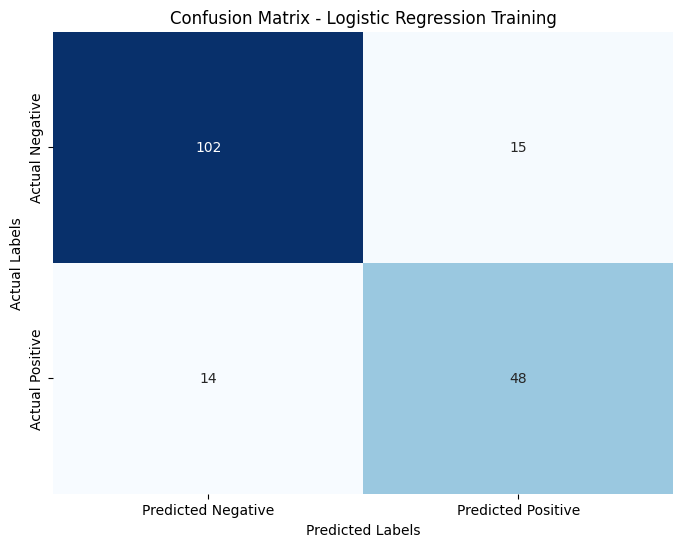

In [ ]:
classification_eval(y_test, y_test_pred, 'Logistic Regression Training')

Model Improvement Points:
1. try to utilize all features
2. feature engineering - derived new features / calculation
3. hyperparameter tuning - model parameter improvements
4. change model to more advanced model (Boosting)